In [6]:
import tellurium as te

In [48]:
mass_action_str = """
model mass_action                    # name the model
      compartment C1;                # specify compartments
      C1 = 1.0;                      # assign compartment volume
      species S1, S2, S3;            # specify species
      S1 in C1; S2 in C1; S3 in C1;  # allocate species to appropriate compartment
    
    J1: S1 -> S2; K1*S1;           # reaction; reaction rate low;
    J2: S2 -> S3; K2*S2;           
   
    S1 = 1;                        # assign species initial conditions
    S2 = 0;
    s3 = 0;                     
    
    K1 = 0.15;                     # assign constant values to global parameters
    K2 = 0.45; 
end
"""
# antStr = '''
# 
#     J1: S1 -> S2; k1*S1; # Reaction names 'J1', 'J2'
#     J2: S2 -> S3; k2*S2;
#     
#     k1 = 0.15; k2 = 0.45; # Specify parameter values
#     S1 = 1; S2 = 0; S3 = 0; # Specify initial conditions
# '''

        time,      [S1],      [S2],       [S3]
 [[        0,         1,         0,          0],
  [ 0.408163,  0.940612, 0.0542023, 0.00518565],
  [ 0.816327,  0.884751, 0.0960909,  0.0191581],
  [  1.22449,  0.832207,  0.127923,  0.0398692],
  [  1.63265,  0.782784,  0.151566,  0.0656494],
  [  2.04082,  0.736296,  0.168563,  0.0951403],
  [  2.44898,  0.692569,  0.180189,   0.127242],
  [  2.85714,  0.651439,  0.187493,   0.161068],
  [  3.26531,  0.612751,  0.191342,   0.195906],
  [  3.67347,  0.576361,  0.192449,    0.23119],
  [  4.08163,  0.542132,  0.191398,    0.26647],
  [   4.4898,  0.509936,  0.188667,   0.301396],
  [  4.89796,  0.479652,   0.18465,   0.335698],
  [  5.30612,  0.451167,  0.179665,   0.369168],
  [  5.71429,  0.424373,  0.173973,   0.401654],
  [  6.12245,   0.39917,  0.167784,   0.433046],
  [  6.53061,  0.375464,  0.161267,   0.463269],
  [  6.93878,  0.353166,  0.154558,   0.492275],
  [  7.34694,  0.332192,  0.147767,   0.520041],
  [   7.7551,  0.31246

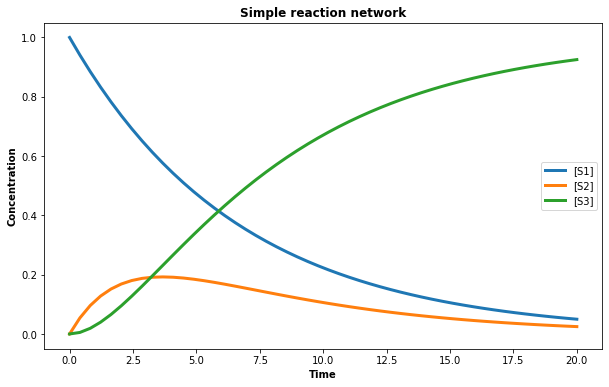

In [72]:
exercise = te.loada(mass_action_str)
result = exercise.simulate(0, 20, 50)
print(result)
exercise.plot(title= 'Simple reaction network', figsize=(10,6), xtitle= 'Time', ytitle= 'Concentration', linewidth= 3)

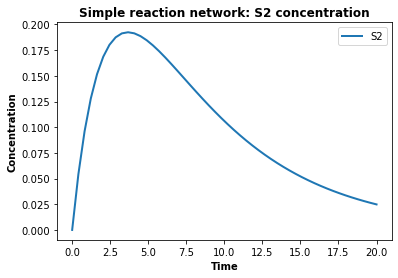

In [73]:
# Exercise 4
# Reset the model species concentrations to the initial conditions
exercise.reset()

# Simulate the model with selections 'time' and 'S2'
exercise.simulate(0, 20, 50, ['time', 'S2'])
exercise.plot(title  = 'Simple reaction network: S2 concentration', xtitle = 'Time', ytitle = 'Concentration')


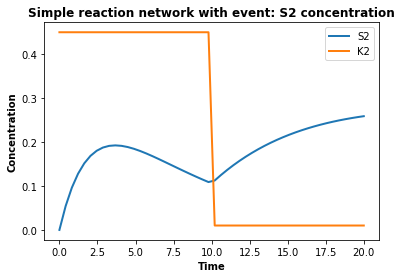

In [86]:
# Exercise 5 Solution
# Add an event to the Antimony string
# mass_action_str_with_event = mass_action_str + """E1: at (time > 10): K2 = 0.01"""
mass_action_str_with_event = """
model mass_action                    # name the model
      compartment C1;                # specify compartments
      C1 = 1.0;                      # assign compartment volume
      species S1, S2, S3;            # specify species
      S1 in C1; S2 in C1; S3 in C1;  # allocate species to appropriate compartment
    
    J1: S1 -> S2; K1*S1;           # reaction; reaction rate low;
    J2: S2 -> S3; K2*S2;           
   
    S1 = 1;                        # assign species initial conditions
    S2 = 0;
    s3 = 0;                     
    
    K1 = 0.15;                     # assign constant values to global parameters
    K2 = 0.45; 
    E1: at (time > 10): K2 = 0.01;
end
"""
exercise = te.loada(mass_action_str_with_event)
# Simulate the model with an event, and record the value of 'K2'
exercise.simulate(0, 20, 50, ['time', 'S2', 'K2'])
exercise.plot(title  = 'Simple reaction network with event: S2 concentration', xtitle = 'Time', ytitle = 'Concentration')
